# Making astronomical finding charts in Python:

We will use the following packages to display astronomical images in python:

- [Astropy](http://www.astropy.org/) ([Robitaille et al. 2013](https://ui.adsabs.harvard.edu/?#abs/2013A&A...558A..33A))
- [Matplotlib](https://matplotlib.org/) ([Hunter 2007](https://ieeexplore.ieee.org/document/4160265))
- [Regions](https://astropy-regions.readthedocs.io/en/latest/)

In [1]:
%matplotlib inline
import sys
import astropy.version
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import Angle, SkyCoord
import regions.version
from regions import CircleSkyRegion, EllipseSkyRegion, read_ds9
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

print('Running on:')
print(f'\tPython\t\t{sys.version[:31]}')
print(f'\tAstropy\t\t{astropy.__version__}')
print(f'\tRegions\t\t{regions.__version__}')
print(f'\tMatplotlib\t{plt.matplotlib.__version__}')

Running on:
	Python		3.6.8 |Anaconda custom (64-bit)
	Astropy		3.2.1
	Regions		0.4
	Matplotlib	3.1.0


In [2]:
# Configuration for matplotlib fonts (to setup latex use in matplotlib)
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


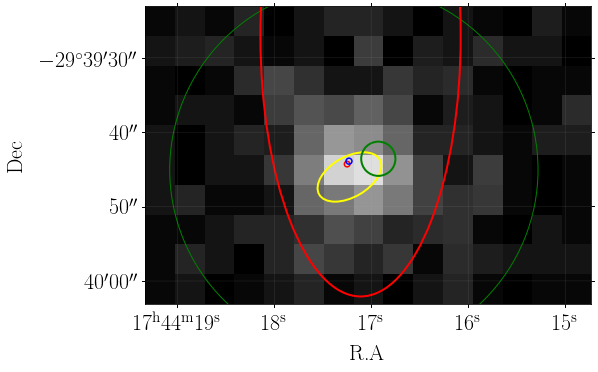

In [3]:
# Reading a fits image file:
fname = 'image.fits'
im  =  fits.open(fname)
data = im[0].data
wcs = WCS(im[0].header, naxis=2)

# cut out a subregion of the image and update the WCS accordingly
center = SkyCoord(266.07052*u.degree, -29.66211*u.degree, frame='icrs')
cut = Cutout2D(data,center, [10,15], wcs=wcs)

figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot(1,1,1, projection=cut.wcs)

# Colormap configuration:
cmap = plt.cm.gray
cmap.set_bad('black')

# plotting the image:
ax.imshow(cut.data,
          norm=colors.PowerNorm(0.6,vmin=0.8, vmax=80),
          cmap=cmap,
          aspect='equal',
          origin='lower', 
          interpolation='none',rasterized=True)

# Now adding coordinate regions. You can do this in two ways:
# 1- Use the built-in functions in the regions package:
swift_old_coords = EllipseSkyRegion(SkyCoord(266.07176, -29.66279, unit='deg', frame='icrs'),
                                    Angle(9.4,'arcsec'),Angle(5.4,'arcsec'),Angle(30,'deg'))
swift_old_pix_reg = swift_old_coords.to_pixel(cut.wcs)
swift_old_pix_reg.visual['color'] = 'yellow'
swift_old_pix_reg.visual['linewidth'] = 2.0
swift_old_pix_reg.plot(ax=ax)

swift_coords = CircleSkyRegion(SkyCoord(266.07052, -29.66211, unit='deg', frame='icrs'),Angle(2.3,'arcsec'))
swift_pix_reg = swift_coords.to_pixel(cut.wcs)
swift_pix_reg.visual['color'] = 'green'
swift_pix_reg.visual['linewidth'] = 2.0
swift_pix_reg.plot(ax=ax)


xmm_coords = CircleSkyRegion(SkyCoord(266.071859877, -29.662309111, unit='deg', frame='icrs'),Angle(0.373,'arcsec'))
xmm_pix_reg = xmm_coords.to_pixel(cut.wcs)
xmm_pix_reg.visual['color'] = 'red'
xmm_pix_reg.visual['linewidth'] = 1.5
xmm_pix_reg.plot(ax=ax)

cxo_coords = CircleSkyRegion(SkyCoord(266.07178, -29.66220, unit='deg', frame='icrs'),Angle(0.4,'arcsec'))
cxo_pix_reg = cxo_coords.to_pixel(cut.wcs)
cxo_pix_reg.visual['color'] = 'blue'
cxo_pix_reg.visual['linewidth'] = 1.5
cxo_pix_reg.plot(ax=ax)


# 2- Read in a DS9 region file:
# For example, I have a region file ("ds9.reg") that looks like this:
"""
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(17:44:17.1788,-29:39:45.035,24.753")
ellipse(17:44:17.1095,-29:39:27.090,13.459",34.993",359.99968) # color=red width=2

"""

# I loop over all the regions in the file and convert each to pixel coordinates in the image and plot them:
regs = read_ds9('./xmm/ds9.reg')
for i, reg in enumerate(regs):
    pix_reg = reg.to_pixel(cut.wcs)
    pix_reg.plot(ax=ax)
    
# fancy the plot
ax.grid(linewidth=0.5,alpha=0.2)
ax.set_xlabel(r"R.A", size=22)
ax.set_ylabel(r"Dec", size=22)
ax.tick_params(labelsize=22)

# Save the figure!
#pyplot.savefig('image.pdf',bbox_inches='tight')